/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross-validation accuracy scores: [0.64814815 0.60465116 0.64186047 0.64651163 0.65581395]
Mean cross-validation accuracy: 0.6394
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       114
           1       0.67      0.59      0.62       135

    accuracy                           0.62       249
   macro avg       0.62      0.62      0.62       249
weighted avg       0.63      0.62      0.62       249



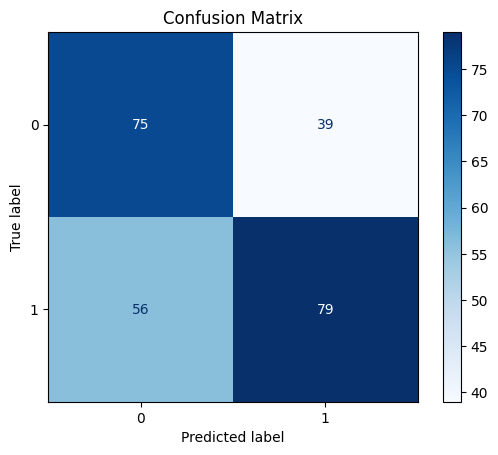

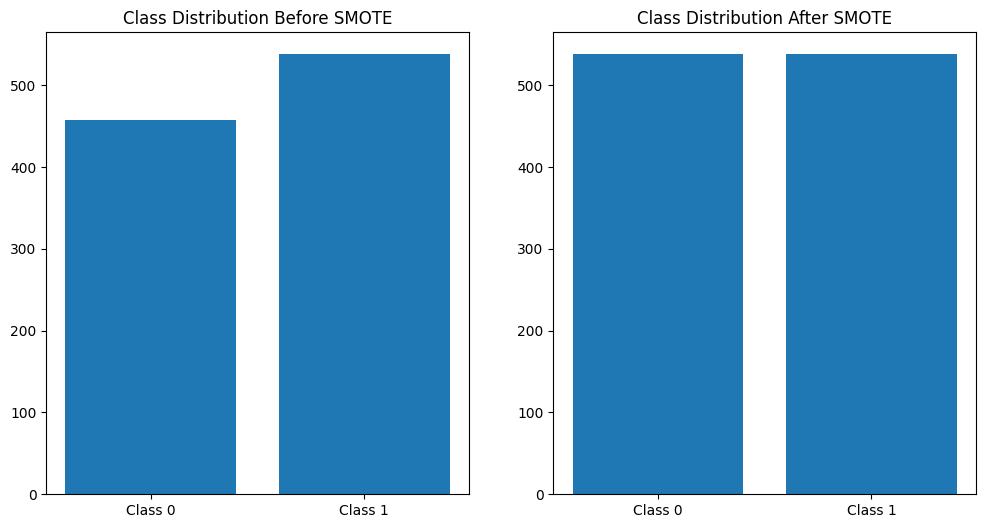

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/sider (1).csv'
data = pd.read_csv(data_path)

# Define features and target column
target_column = 'Hepatobiliary disorders'  # You can change this to another target column
X_smiles = data['smiles']
y = data[target_column]

# Convert SMILES strings into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_smiles)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svm_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.4f}")

# Train the model
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualize class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(['Class 0', 'Class 1'], [sum(y_train == 0), sum(y_train == 1)])
ax[0].set_title("Class Distribution Before SMOTE")
ax[1].bar(['Class 0', 'Class 1'], [sum(y_train_smote == 0), sum(y_train_smote == 1)])
ax[1].set_title("Class Distribution After SMOTE")
plt.show()
